# Visualization

In [1]:
from models.SVRCNet.svrc import SVRC
from utils.trainer import Evaluator
from utils.read_videos import read

import torch
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from torchvision import transforms

import os
from ast import literal_eval

print(torch.version.cuda)

%load_ext autoreload
%autoreload 2

None


In [2]:
#!pip install torchviz

     |████████████████████████████████| 46 kB 2.9 MB/s eta 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=2c746a1fa4a96a4d06ceb7f9b1644bba311477a8790dde1511bc29911cfda149
  Stored in directory: /Users/harrypotter/Library/Caches/pip/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


In [3]:
#!brew install graphviz

Running `brew update --preinstall`...
==> Auto-updated Homebrew!
Updated 4 taps (homebrew/cask-versions, homebrew/core, homebrew/cask and homebrew/services).
==> New Formulae
autocannon          difftastic          httpyac             libmarpa
cloudflare-quiche   ecflow-ui           ifacemaker          mariadb@10.6
criterion           gi-docgen           imposm3             mongodb-atlas-cli
dagger              gops                kmod                nvchecker
ddcutil             highs               libcython           ugit
==> Updated Formulae
Updated 900 formulae.
==> Deleted Formulae
boost-python               griffon                    komposition
==> New Casks
accord          bettermouse     lapce           postman-agent   warp
anypointstudio  free-gpgmail    osp-tracker     readyapi
audiorelay      kdenlive        polymc          simplemind
==> Updated Casks
Updated 645 casks.

To reinstall 3.0.0, run:
  brew reinstall graphviz


In [4]:
from torchviz import make_dot

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = SVRC('resnet18')
if torch.cuda.is_available():
    model.to(device)

# this does not necessarily affect what mode we're running at
# weights of resnet is not changed anyway
# !!!!!! DELETE THIS LINE !!!!!!
#WeightsPath_LSTM = 'models/weights_resnet18_70_LSTM'
#model.load_state_dict(torch.load(WeightsPath_LSTM, map_location=device))

In [ ]:
X = torch.rand(2, 3, 224,224)
y = model(X)
make_dot(y.mean(), params=dict(model.named_parameters()))

## sth

In [3]:
# put videos here!
video_base = 'data/videos'
#video_base = 'D:/e6691/6691_assignment2/videos'
videos = [vid for vid in os.listdir(video_base) if vid.endswith('mp4')]
# images will be output to here
image_base = 'data/images'
#image_base = 'D:/e6691/6691_assignment2/images'

In [4]:
test_videos = sorted(videos)[1:2]
test_videos

['RALIHR_surgeon01_fps01_0002.mp4']

In [5]:
image_paths, labels = read(test_videos, image_base, ind_end=60)

In [6]:
X_test = sum(image_paths, [])
y_test = sum(labels, [])

In [7]:
list(zip(X_test, y_test))

[('data/images/RALIHR_surgeon01_fps01_0002/1-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/2-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/3-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/4-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/5-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/6-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/7-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/8-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/9-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/10-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/11-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/12-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/13-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/14-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/15-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/16-12.png', 12),
 ('data/images/RALIHR_surgeon01_fps01_0002/17-13.

In [8]:
data_transform = {
    'train': transforms.Compose([
        #transforms.Resize((32,32)),
        transforms.RandomHorizontalFlip(), 
        transforms.RandomVerticalFlip(),
        transforms.RandomResizedCrop(size=(32,32), scale=(0.4,1.0), ratio=(1.0,1.0)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485], std=[0.229])
    ]), 
    'valid': transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485], std=[0.229])
    ])
}

In [9]:
evaluator = Evaluator(model, device, batch_size=64)
preds = evaluator.predict(X_test, data_transform, pretrain=False)

In [14]:
res = evaluator.eval(preds, y_test, inspect=11)

Accuracy: 0.0906816760475297
Precision-Recall-Fscore-Support: (0.041442465713088135, 0.05872067154007134, 0.03158240995105285, None)
AUC: <function auc at 0x7fac323e9dc0>


/Users/harrypotter/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harrypotter/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


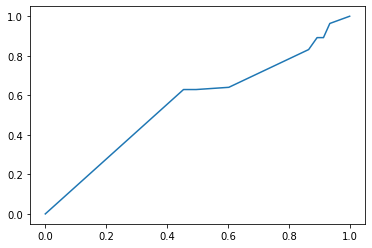

In [18]:
res['roc']
plt.plot(res['roc'][0], res['roc'][1])